# Groupby 

files needed = ('Most-Recent-Cohorts-Institution.csv')

We often want to know how groups differ. Do workers with econ degrees make more than workers with history degrees? Do men live longer than women? Does it matter how much education you have? 

Pandas provides the `groupby( )` method to ease computing statistics by group ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)). This kind of method shows up in many data-oriented computing languages and packages. The idea is summed up as 

> split-apply-combine

Here is the canonical [illustration](https://www.oreilly.com/library/view/learning-pandas/9781783985128/ch09s02.html). The big idea is to 

1. **Split** the data up into groups. The groups are defined by *key* variables.
2. **Apply** some method or function to each group: mean, std, max, etc. This returns a smaller bit of data, often just one number.
3. **Combine** the results of the 'apply' from each group into a new data structure.
  
  
Apply-split-combine is an incredibly powerful feature of pandas. We will cover the basics here. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

## College Scorecard
Let's take this opportunity to learn about a new dataset: [The College Scorecard](https://collegescorecard.ed.gov/data/). The data are compiled by the Dept. of Education to help students evaluate higher education institutions. The data are very well documented and include such juicy variables as: prices, after-program debt levels, earnings, completion rates, and information about student outcomes by family income and other demographic variables. 

We will be working off of the 'institution-level' data file.

\[There is an [api](https://collegescorecard.ed.gov/data/documentation/), too, but we would all have to sign up for a key.\]



The data set is large. There are thousands of variables. I am creating a dict that holds the variable name in the data set and the name I will use in my DataFrame. This will come in handy...

How did I figure out the variable names and definitions? I read [the documentation](https://collegescorecard.ed.gov/data/documentation/).

In [56]:
variables = {'CONTROL':'ownership', 'INSTNM':'name', 
             'STABBR':'state', 'PREDDEG':'type', 
             'SATVRMID':'sat_read_med', 'SATMTMID':'sat_math_med', 'SATWRMID':'sat_write_med', 
             'PCIP52':'sh_bus', 'PCIP11':'sh_cs', 'PCIP14':'sh_eng', 'PCIP26':'sh_bio', 
             'PCIP45':'sh_ss', 'PCIP51':'sh_health', 'PCIP09':'sh_com',
             'MD_EARN_WNE_P10':'earn_10', 'GRAD_DEBT_MDN_SUPP':'debt_at_grad'}

In [57]:
colscd = pd.read_csv('Most-Recent-Cohorts-Institution.csv', 
                     na_values=['PrivacySuppressed', 'NULL'], 
                     usecols=variables.keys())

We are loading a new data set. Let's do our checks. 

Here, I'm using the `.info()` method of DataFrame. It gives me the shape of the DataFrame and the dtypes. 

In [59]:
colscd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INSTNM              6681 non-null   object 
 1   STABBR              6681 non-null   object 
 2   PREDDEG             6681 non-null   int64  
 3   CONTROL             6681 non-null   int64  
 4   SATVRMID            1085 non-null   float64
 5   SATMTMID            1085 non-null   float64
 6   SATWRMID            705 non-null    float64
 7   PCIP09              5835 non-null   float64
 8   PCIP11              5835 non-null   float64
 9   PCIP14              5835 non-null   float64
 10  PCIP26              5835 non-null   float64
 11  PCIP45              5835 non-null   float64
 12  PCIP51              5835 non-null   float64
 13  PCIP52              5835 non-null   float64
 14  MD_EARN_WNE_P10     5025 non-null   float64
 15  GRAD_DEBT_MDN_SUPP  4892 non-null   float64
dtypes: flo

In [60]:
display(colscd.head(2))
display(colscd.tail(2))

,INSTNM,STABBR,PREDDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,PCIP09,PCIP11,PCIP14,PCIP26,PCIP45,PCIP51,PCIP52,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,AL,3,1,475.0,455.0,414.0,0.0000,0.0342,0.1573,0.1282,0.0308,0.0000,0.1624,36339.0,31000.0
1,University of Alabama at Birmingham,AL,3,1,614.0,595.0,NaN,0.0323,0.0258,0.0552,0.0969,0.0309,0.2371,0.1986,46990.0,22250.0


,INSTNM,STABBR,PREDDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,PCIP09,PCIP11,PCIP14,PCIP26,PCIP45,PCIP51,PCIP52,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
6679,Pennsylvania State University-Penn State Harri...,PA,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6680,Pennsylvania State University-Penn State Brand...,PA,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data preparation

Let's clean this up a bit. 

1. Let's rename the variables to something easier to understand. This is the second place I'm using the `variables` dict. 

In [61]:
colscd = colscd.rename(columns = variables)
colscd.head(3)

,name,state,type,ownership,sat_read_med,sat_math_med,sat_write_med,sh_com,sh_cs,sh_eng,sh_bio,sh_ss,sh_health,sh_bus,earn_10,debt_at_grad
0,Alabama A & M University,AL,3,1,475.0,455.0,414.0,0.0000,0.0342,0.1573,0.1282,0.0308,0.0000,0.1624,36339.0,31000.0
1,University of Alabama at Birmingham,AL,3,1,614.0,595.0,NaN,0.0323,0.0258,0.0552,0.0969,0.0309,0.2371,0.1986,46990.0,22250.0
2,Amridge University,AL,2,2,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5224,37895.0,31417.0


2. Let's recode the categorical variables. The ownership and type variables are coded as integers. I would rather they were easy to understand. We could use statements like

```python 
colscd.loc[colscd['type']==1, 'type'] = 'cert'
```
for each change we want to make, but that would get tedious. Instead, we will use the pandas method `.replace()`. We pass the `.replace()` method a dictionary in which the keys are the objects we want to replace and the values are what we want to replace them with. 

Let's take a look.

In [62]:
type_codes = {0:'na', 1:'cert', 2:'asc', 3:'bach', 4:'grad_only'}
colscd['type'] = colscd['type'].replace(type_codes)

own_codes = {1:'Public', 2:'Private nonprofit', 3:'Private profit'}
colscd['ownership'] = colscd['ownership'].replace(own_codes)
colscd.head()

,name,state,type,ownership,sat_read_med,sat_math_med,sat_write_med,sh_com,sh_cs,sh_eng,sh_bio,sh_ss,sh_health,sh_bus,earn_10,debt_at_grad
0,Alabama A & M University,AL,bach,Public,475.0,455.0,414.0,0.0000,0.0342,0.1573,0.1282,0.0308,0.0000,0.1624,36339.0,31000.0
1,University of Alabama at Birmingham,AL,bach,Public,614.0,595.0,NaN,0.0323,0.0258,0.0552,0.0969,0.0309,0.2371,0.1986,46990.0,22250.0
2,Amridge University,AL,asc,Private nonprofit,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5224,37895.0,31417.0
3,University of Alabama in Huntsville,AL,bach,Public,645.0,655.0,NaN,0.0155,0.0667,0.2848,0.0593,0.0121,0.1630,0.1731,54361.0,21450.0
4,Alabama State University,AL,bach,Public,485.0,462.0,NaN,0.0963,0.0570,0.0053,0.0588,0.0160,0.1105,0.1141,32084.0,31000.0


Set the index to the university name. 
How does the UW look?

In [63]:
colscd.set_index('name', inplace=True)
colscd.loc['University of Wisconsin-Madison']

state                 WI
type                bach
ownership         Public
sat_read_med       650.0
sat_math_med       710.0
sat_write_med      640.0
sh_com            0.0646
sh_cs             0.0584
sh_eng            0.0937
sh_bio            0.1011
sh_ss             0.0888
sh_health          0.073
sh_bus            0.1475
earn_10          65213.0
debt_at_grad     20500.0
Name: University of Wisconsin-Madison, dtype: object

We are a public university that predominantly gives out bachelor degrees. The largest major is business, then biology and engineering. Median earnings 10 years after graduating is 70k and median debt at graduation is 20k.

## Apply-split-combine

The data are in good shape. Let's explore `.groupby()`. 

We look at each step separately first, to see what it does, then we will chain them all together to apply-split-combine all in one line of code. 

## 1. Split: groupby( )
We pass `.groupby()` a *key* which tells the method which variable to, well, group by. We will group by state. This is the **split** step.

What is `colscd_grouped`?

In [64]:
colscd_grouped = colscd.groupby('state')
print(type(colscd_grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


A DataFrameGroupBy object. This is basically a DataFrame + the grouping information. 

What does it look like? A DataFrameGroupBy is an iterable object. It returns subsets of the original DataFrame by group. In our case, the groups are defined by state. 

The `.get_group()` returns a group. 

In [65]:
colscd_grouped.get_group('WI').sort_index()                 #get_group: extract specific df

colscd_grouped.get_group('AK').sort_index()

,state,type,ownership,sat_read_med,sat_math_med,sat_write_med,sh_com,sh_cs,sh_eng,sh_bio,sh_ss,sh_health,sh_bus,earn_10,debt_at_grad
name,,,,,,,,,,,,,,,
Alaska Bible College,AK,bach,Private nonprofit,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN
Alaska Career College,AK,cert,Private profit,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.8093,0.1907,31891.0,9033.0
Alaska Christian College,AK,asc,Private nonprofit,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.1429,0.0000,NaN,NaN
Alaska Pacific University,AK,bach,Private nonprofit,NaN,NaN,455.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4286,47267.0,22272.0
Alaska Vocational Technical Center,AK,cert,Public,NaN,NaN,NaN,0.0000,0.0952,0.0000,0.0000,0.0000,0.0000,0.0762,36167.0,NaN
Ilisagvik College,AK,cert,Public,NaN,NaN,NaN,0.0000,0.0417,0.0000,0.0000,0.0000,0.1250,0.4583,48224.0,NaN
University of Alaska Anchorage,AK,bach,Public,NaN,NaN,NaN,0.0062,0.0197,0.0489,0.0125,0.0245,0.2494,0.1372,47891.0,20500.0
University of Alaska Fairbanks,AK,bach,Public,585.0,575.0,510.0,0.0082,0.0363,0.0817,0.0372,0.0254,0.1344,0.1444,43728.0,19582.0
University of Alaska Southeast,AK,cert,Public,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0419,0.0443,0.1478,0.1823,40727.0,20000.0


...and there is every degree-granting institution in Wisconsin from [Academy of Beauty Professionals](https://www.academyofbeautyprofessionals.com/) to the [Wright Graduate University for the Realization of Human Potential](http://www.wrightgrad.edu/).

## 2. + 3. Apply and combine
A major use of groupby is to perform some kind of aggregation. This is the **apply** and **combine** step. Let's take the grouped data and compute some means. 

In [19]:
# apply the mean operator to the grouped data
all_means = colscd_grouped.mean(numeric_only=True)    #numeric_only=True: drop string/obejct column before calculation
all_means

 # what do we get back?
#print(type(all_means))            

,type,ownership,sat_read_med,sat_math_med,sat_write_med,sh_com,sh_cs,sh_eng,sh_bio,sh_ss,sh_health,sh_bus,earn_10,debt_at_grad
state,,,,,,,,,,,,,,
AK,2.000000,1.555556,585.000000,575.000000,482.500000,0.001600,0.021433,0.014511,0.010178,0.010467,0.178756,0.179744,42270.714286,18277.400000
AL,1.827586,1.770115,550.894737,544.578947,498.000000,0.013281,0.021153,0.015708,0.025835,0.012566,0.216103,0.118053,36591.563380,20249.212121
AR,1.566667,2.011111,548.153846,540.615385,464.200000,0.006772,0.015649,0.004296,0.015369,0.009268,0.194900,0.089947,31120.346667,14847.956522
AS,2.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.066700,0.000000,0.033300,0.144400,0.138900,27265.000000,NaN
AZ,1.495868,2.190083,577.833333,565.833333,505.000000,0.005814,0.021267,0.006633,0.005202,0.008697,0.240191,0.060856,36405.657534,12363.085366
CA,1.810924,2.229692,588.031746,589.285714,570.540000,0.011961,0.023658,0.007191,0.012082,0.028648,0.254670,0.084444,42634.263858,14462.199552
CO,1.817204,2.086022,567.857143,563.928571,570.000000,0.021786,0.024259,0.020730,0.015216,0.019414,0.206290,0.093473,39542.411765,15761.932432
CT,1.858974,2.038462,590.785714,587.000000,532.083333,0.018384,0.012712,0.027207,0.022047,0.040163,0.224787,0.095419,48662.017857,15499.276923
DC,2.423077,2.230769,626.600000,621.600000,605.000000,0.026047,0.083941,0.018388,0.022694,0.086382,0.188029,0.211618,49081.470588,21456.736842


When we used `.mean()` on the grouped data, it **applied** the mean method to each group, which creates one number per group (for each column). It then **combined** the means into a DataFrame, one number per group per column. Nice.  

Notice that the categorical data (name, state, type) have been dropped. `.mean()` doesn't know what to do with string data.

## 1. + 2. + 3. Split-apply-combine

Computing the grouped data first helped us understand what was happening, but we typically do the whole split-apply-combine in one step. One simple line of code.

In [14]:
all_means = colscd.groupby('state').mean(numeric_only=True)
all_means.head(10)

,sat_read_med,sat_math_med,sat_write_med,sh_com,sh_cs,sh_eng,sh_bio,sh_ss,sh_health,sh_bus,earn_10,debt_at_grad
state,,,,,,,,,,,,
AK,585.000000,575.000000,482.500000,0.001600,0.021433,0.014511,0.010178,0.010467,0.178756,0.179744,42270.714286,18277.400000
AL,550.894737,544.578947,498.000000,0.013281,0.021153,0.015708,0.025835,0.012566,0.216103,0.118053,36591.563380,20249.212121
AR,548.153846,540.615385,464.200000,0.006772,0.015649,0.004296,0.015369,0.009268,0.194900,0.089947,31120.346667,14847.956522
AS,NaN,NaN,NaN,0.000000,0.000000,0.066700,0.000000,0.033300,0.144400,0.138900,27265.000000,NaN
AZ,577.833333,565.833333,505.000000,0.005814,0.021267,0.006633,0.005202,0.008697,0.240191,0.060856,36405.657534,12363.085366
CA,588.031746,589.285714,570.540000,0.011961,0.023658,0.007191,0.012082,0.028648,0.254670,0.084444,42634.263858,14462.199552
CO,567.857143,563.928571,570.000000,0.021786,0.024259,0.020730,0.015216,0.019414,0.206290,0.093473,39542.411765,15761.932432
CT,590.785714,587.000000,532.083333,0.018384,0.012712,0.027207,0.022047,0.040163,0.224787,0.095419,48662.017857,15499.276923
DC,626.600000,621.600000,605.000000,0.026047,0.083941,0.018388,0.022694,0.086382,0.188029,0.211618,49081.470588,21456.736842


### Aggregation methods

Some common aggregation methods include: `.mean()`, `.sum()`, `.std()`, `.describe()`, `.min()`, `.max()`, but there are many more. Any function that returns a scalar will work. 

### groupby( ) on a subset of columns
We may not care about all the columns in our datset for a particular groupby. We can subset our DataFrame as usual and compute a groupby. This saves computing statistics we do not want. For a large data set, this can save time.

Let's focus on the median SAT scores. We will group by the 'ownership' variable.

In [15]:
# Grab the cols we want from the df before using the groupby. Remember to keep the grouping variable, too.
sat_medians_1 = colscd[['sat_read_med', 'sat_math_med', 'sat_write_med', 'ownership']].groupby('ownership').median()
sat_medians_1

,sat_read_med,sat_math_med,sat_write_med
ownership,,,
Private nonprofit,560.0,547.0,508.0
Private profit,563.5,568.5,475.0
Public,550.0,545.0,495.0


## Top Hat Practice Exercise: Groupby

1. Create a dataset with only the public institutions from `colscd` DataFrame. Name it `pub`. 

The public institutions are the ones with `ownership` equal to 'Public'. 

In [30]:
pub = colscd[colscd.ownership == 1]
pub.head(5)
q75 = pub[['type','earn_10']].groupby('type').quantile(0.75)
q75

,earn_10
type,
0,41470.0
1,38469.5
2,39706.5
3,55410.0
4,63897.5


The `.quantile( )` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)) computes quantiles from the data. (e.g., `.quantile(0.5)` computes the median, or the the 50th quantile)

2. Let's look at a measure of the earnings variation for different institution types:

    a. Compute the 75th quantile for 'earn_10' for each **type**. Name the new DataFrame 'q75'.      
    b. Compute the 25th quantile for 'earn_10' for each **type**. Name the new DataFrame 'q25'.
    
You should have two new DataFrames, each containing one of the quantile statistics. 

In [27]:
pub = colscd[colscd.ownership == 'Public']

q75 = pub[['type','earn_10']].groupby('type').quantile(0.75)
q75
q25= pub[['type','earn_10']].groupby('type').quantile(0.25)
q25

,earn_10
type,
asc,33034.50
bach,42102.00
cert,29887.50
grad_only,39152.75
na,34393.00


c. For each type, compute the difference between the 75 percentile and the 25 percentile. 

This is sometimes called the *inter-quartile range*. It is a measure of the variability of a variable. It is less sensitive to outliers than the standard deviation. 

In [28]:
quartile_diff = q75 -q25
quartile_diff


#the difference between 75 and 25 percentile for bacherlors is 13308


,earn_10
type,
asc,6672.00
bach,13308.00
cert,8582.00
grad_only,24744.75
na,7077.00


Understanding the variation in income from different school types could be an interesting project. Let's practice some more. 

3. How do SAT reading scores and graduate earning correlate?

    a. Compute the median SAT reading score and median 10-year earnings by **state**. 

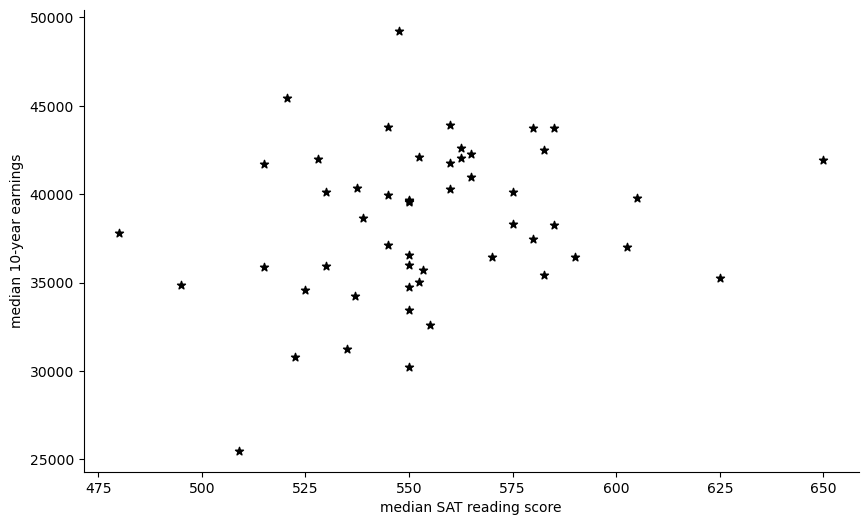

In [66]:
#a
sat = pub[['sat_read_med','earn_10','state']].groupby('state').quantile(0.5)
sat

#b
#ax = sat.plot.scatter(x="sat_read_med", y='earn_10')
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(sat['sat_read_med'], sat['earn_10'], color='black', marker='*')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('median SAT reading score')
ax.set_ylabel('median 10-year earnings')

plt.show()

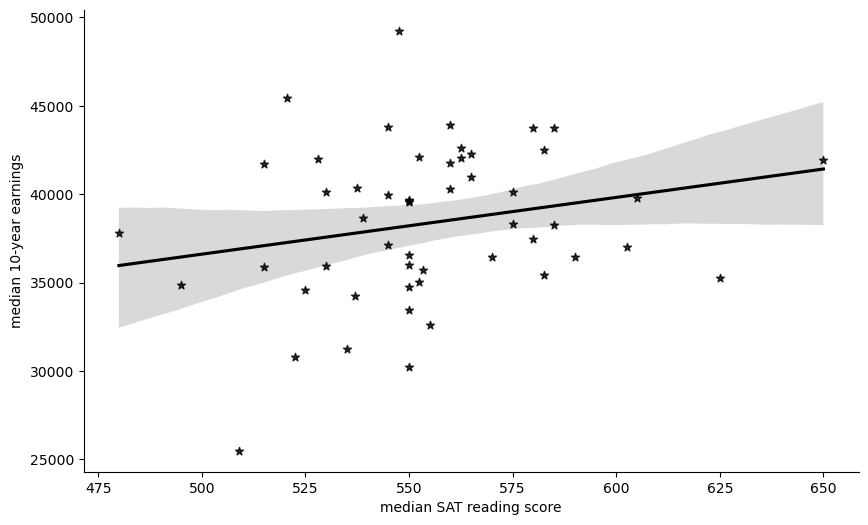

In [67]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(x=sat['sat_read_med'], y=sat['earn_10'], color='black', marker='*')

ax.set_xlabel('median SAT reading score')
ax.set_ylabel('median 10-year earnings')

sns.despine()

plt.show()

b. Create a scatter plot with the median SAT reading score on the x axis and median 10-year income on the y axis.  

If you read the seaborn notebook from week 5, you can try a `.regplot()`.

### Several statistics at once
Once we have grouped our data, we have been applying methods to compute a single statistic: `mean()`, `count()`,...

We now introduced the `.agg( )` method, which lets us compute several moments at once&mdash;you can even pass it a user-defined function. 

In [35]:
# This is the same as groupby('type').count()
print(colscd[['earn_10', 'type']].groupby('type').agg('count')  )           #number of degrees each institution grants 

print(colscd[['earn_10', 'type']].groupby('type').count())


      earn_10
type         
0         375
1        1838
2         977
3        1811
4          24
      earn_10
type         
0         375
1        1838
2         977
3        1811
4          24


In [34]:
# But agg() lets us compute many stats at once
colscd[['earn_10', 'sat_read_med', 'type']].groupby('type').agg(['count', 'mean', 'median', 'std', 'max'])

earn_10                                                sat_read_med  \
            count          mean   median           std       max        count   
type                                                                            
asc           977  37069.128966  36011.0   9288.002214  105693.0           20   
bach         1811  50305.060188  47834.0  14723.971534  132969.0         1060   
cert         1838  29673.083787  27736.5   9801.022167   87731.0            5   
grad_only      24  56196.291667  52835.0  19159.779123   97371.0            0   
na            375  39440.002667  38868.0  10931.703638   93291.0            0   

                                                 
                 mean median         std    max  
type                                             
asc        525.750000  515.0   62.393383  700.0  
bach       565.911321  555.0   63.161825  760.0  
cert       525.600000  508.0  115.149034  700.0  
grad_only         NaN    NaN         NaN    NaN  
na                NaN    NaN         NaN    NaN

Now we have a multiIndex on the columns.

We can use `.agg()` to pass a user-defined function, too. We will work on that in the practice problems. 

### groupby( ) with many keys
Can we group by several keys? You know we can. Let's compute the medians of the DataFrame this time.

In [35]:
all_medians = colscd.groupby(['ownership','type']).median(numeric_only=True)
all_medians

sat_read_med  sat_math_med  sat_write_med  \
ownership         type                                                   
Private nonprofit asc               550.0         516.5          455.0   
                  bach              560.0         549.0          510.0   
                  cert              508.0         491.0          492.5   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   
Private profit    asc               529.0         532.0            NaN   
                  bach              598.0         605.0          475.0   
                  cert                NaN           NaN            NaN   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   
Public            asc               510.0         483.0          415.0   
                  bach              550.0         545.0          495.0   
                  cert                NaN           NaN          391.0   
                  grad_only           NaN           NaN            NaN   
                  na                  NaN           NaN            NaN   

                             sh_com    sh_cs  sh_eng  sh_bio   sh_ss  \
ownership         type                                                 
Private nonprofit asc        0.0000  0.00000  0.0000  0.0000  0.0000   
                  bach       0.0105  0.00830  0.0000  0.0405  0.0122   
                  cert       0.0000  0.00000  0.0000  0.0000  0.0000   
                  grad_only  0.0000  0.00000  0.0000  0.0000  0.0000   
                  na            NaN      NaN     NaN     NaN     NaN   
Private profit    asc        0.0000  0.00000  0.0000  0.0000  0.0000   
                  bach       0.0000  0.01150  0.0000  0.0000  0.0000   
                  cert       0.0000  0.00000  0.0000  0.0000  0.0000   
                  grad_only  0.0000  0.00000  0.0000  0.0000  0.0000   
                  na            NaN      NaN     NaN     NaN     NaN   
Public            asc        0.0000  0.02570  0.0000  0.0000  0.0000   
                  bach       0.0353  0.03190  0.0073  0.0493  0.0453   
                  cert       0.0000  0.01335  0.0000  0.0000  0.0000   
                  grad_only     NaN      NaN     NaN     NaN     NaN   
                  na            NaN      NaN     NaN     NaN     NaN   

                             sh_health   sh_bus  earn_10  debt_at_grad  
ownership         type                                                  
Private nonprofit asc          0.05760  0.00000  36284.0       16790.0  
                  bach         0.03300  0.15250  48210.0       25000.0  
                  cert         0.58120  0.00000  29463.0       12000.0  
                  grad_only    0.00000  0.00000  52835.0       20750.0  
                  na               NaN      NaN  43125.0       25425.0  
Private profit    asc          0.55155  0.00000  34601.0       16063.0  
                  bach         0.01560  0.14680  43590.0       28308.0  
                  cert         0.00000  0.00000  25028.0        9500.0  
                  grad_only    0.00000  0.00000  67040.5       29349.0  
                  na               NaN      NaN  36822.0       20000.0  
Public            asc          0.17940  0.09615  36177.0       10500.0  
                  bach         0.09590  0.16680  48272.0       21175.0  
                  cert         0.31825  0.03165  33758.0        9500.0  
                  grad_only        NaN      NaN  50661.5       26999.0  
                  na               NaN      NaN  37321.0       11264.0

Now we have a multiIndexed DataFrame with the summary statistics, this time, the median. 

The three ownership types (private nonprofit, private profit, and public) all have institutions that predominately offer bachelors degrees. How do the median SAT scores compare across public and private institutions? 

Let's grab that set of statistics, a quick practice with multiIndex. 

In [36]:
bach_sat_med = all_medians[['sat_read_med', 'sat_math_med', 'sat_write_med']].xs('bach', level='type')         # xs() indexes data from a MultiIndex
bach_sat_med

,sat_read_med,sat_math_med,sat_write_med
ownership,,,
Private nonprofit,560.0,549.0,510.0
Private profit,598.0,605.0,475.0
Public,550.0,545.0,495.0


## Bonus Practice to Try at Home
1. Below is a function that returns the average of the 5 largest elements of a Series (a column of a DataFrame). 

The input, `x`,  will be a column of a DataFrame. The output is a single number. 

```python
def avg5(x):
    top5 = x.sort_values().iloc[-5:]     # sort x, then grab the five largest. 
    return top5.mean()                   # return the mean 
```

In [43]:
def avg5(x):
    top5 = x.sort_values().iloc[-5:]    
    return top5.mean()    

2. Test the function on column 'a' of the DataFrame defined below. The answer should be 8.

```python
test = pd.DataFrame({'a':[1, 4, 6, 9, 10, 3, 7, 8], 'b':[2, 3, 4, 5, 6, 7, 8, 10] })
```


The command would look like: 
```python
avg5(test['a'])
```

In [44]:
test = pd.DataFrame({'a':[1, 4, 6, 9, 10, 3, 7, 8], 'b':[2, 3, 4, 5, 6, 7, 8, 10] })
test

,a,b
0,1,2
1,4,3
2,6,4
3,9,5
4,10,6
5,3,7
6,7,8
7,8,10


In [45]:
avg5(test['a'])

8.0

Now return to `colscd`

3. Drop any observation that has 'debt_at_grad' == NaN. Use the `.dropna()` method ([docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.dropna.html)). 

```python
colscd.dropna(subset=['debt_at_grad'], inplace=True)
```

4. Compute the mean, median, and avg5 of 'debt_at_grad' by **'ownership'**. Compute them all at once using `.agg()`. Since `avg5` is user-defined, we pass the name of the function without quotes. i.e., `.agg(['mean', avg5])`.

In [51]:
colscd.dropna(subset=['debt_at_grad'], inplace=True)
df4 = colscd[['debt_at_grad','ownership']].groupby('ownership').agg(['mean','median', avg5])
df4

debt_at_grad                  
                   mean   median     avg5
ownership                                
1          14557.569043  12438.0  32150.0
2          22495.858984  24365.0  40820.8
3          12998.449432   9833.0  43618.6

If you want to practice some more, try writing two functions: One returns the 25 percentile and one returns the 75 percentile. 


Then redo question 2 from the first practice, but using only one groupby and the `.agg()` method. 

2. Let's look at a measure of the earnings spread for different institution types
   1. Compute the 75th quantile for 'earn_10' for each 'type'.
   2. Compute the 25th quantile for 'earn_10' for each 'type'.

You should have only one new DataFrame containing all of the quantile statistics.

In [54]:
def qt75(x):
    return x.quantile(0.75)
    
def qt25(x):
    return x.quantile(0.25)
    
qts = colscd[['earn_10', 'type']].groupby('type').agg([qt25, qt75])
qts

earn_10         
          qt25     qt75
type                   
0     34727.00  43590.0
1     23934.00  34568.0
2     33255.25  40982.5
3     41861.00  56669.5
4     43800.00  61997.0

C. For each type, compute the difference between the 75 percentile and the 25 percentile. 

This is sometimes called the *inter-quartile range*. It is a measure of the variability of a variable. It is less sensitive to outliers than the standard deviation. 

\[The simplest way to do this is to use a *lambda function* rather than write our own two functions. We have not covered these in class but it would not be difficult to learn on your own. Try searching for 'pandas agg pass argument.'\]